In [1]:
import pandas as pd
from sqlalchemy import create_engine

In [2]:
#Connecting to MySQL database
username = "root",
password = "Danieledem_7",
host = "localhost",
database = "creditscoringafrica"

In [3]:
engine = create_engine(f"mysql+mysqlconnector://{'root'}:{'Danieledem_7'}@{'localhost'}/{'creditscoringafrica'}")

In [12]:
# Use pandas with the SQLAlchemy engine

customers_df = pd.read_sql("SELECT * FROM customers", engine)
creditscorehistory_df = pd.read_sql("SELECT * FROM creditscorehistory", engine)
loanapplications_df = pd.read_sql("SELECT * FROM loanapplications", engine)
mobileusage_df = pd.read_sql("SELECT * FROM mobileusage", engine)
transactions_df = pd.read_sql("SELECT * FROM transactions", engine)


In [7]:
print(customers_df.head())

   CustomerID FirstName  LastName  Age  Country  Income EmploymentStatus  \
0           1       Ama    Mensah   28    Ghana   450.0         Employed   
1           2      John       Doe   35  Nigeria   800.0    Self-Employed   
2           3     Amina    Hassan   22    Kenya   300.0       Unemployed   
3           4     Kwame   Nkrumah   40    Ghana  1200.0         Employed   
4           5    Zainab  Abdullah   31   Uganda   600.0         Employed   

   AccountAge  
0          24  
1          36  
2          12  
3          48  
4          30  


### Data Cleaning

In [16]:
#Checking for missing values

print(customers_df.isnull().sum())
print(creditscorehistory_df.isnull().sum())
print(loanapplications_df.isnull().sum())
print(mobileusage_df.isnull().sum())
print(transactions_df.isnull().sum())

#Converting data to date time
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])
mobileusage_df['DateRecorded'] = pd.to_datetime(mobileusage_df['DateRecorded'])
loanapplications_df['ApplicationDate'] = pd.to_datetime(loanapplications_df['ApplicationDate'])
creditscorehistory_df['DateUpdated'] = pd.to_datetime(creditscorehistory_df['DateUpdated'])

CustomerID          0
FirstName           0
LastName            0
Age                 0
Country             0
Income              0
EmploymentStatus    0
AccountAge          0
dtype: int64
ScoreID        0
CustomerID     0
Score          0
DateUpdated    0
dtype: int64
LoanID             0
CustomerID         0
LoanAmount         0
ApplicationDate    0
Status             0
dtype: int64
UsageID                0
CustomerID             0
MonthlyDataUsage       0
AverageMonthlyCalls    0
DateRecorded           0
dtype: int64
TransactionID      0
CustomerID         0
Amount             0
TransactionDate    0
Type               0
dtype: int64


### Demography Analysis

         Income                                                           \
          count         mean         std     min     25%     50%     75%   
Country                                                                    
Ethiopia    1.0  1200.000000         NaN  1200.0  1200.0  1200.0  1200.0   
Ghana       4.0   862.500000  349.702254   450.0   637.5   900.0  1125.0   
Kenya       3.0   473.333333  161.658075   300.0   400.0   500.0   560.0   
Nigeria     3.0   700.000000  264.575131   400.0   600.0   800.0   850.0   
Uganda      2.0   725.000000  176.776695   600.0   662.5   725.0   787.5   

                   Age             ...              AccountAge             \
             max count       mean  ...    75%   max      count       mean   
Country                            ...                                      
Ethiopia  1200.0   1.0  45.000000  ...  45.00  45.0        1.0  72.000000   
Ghana     1200.0   4.0  33.750000  ...  38.50  40.0        4.0  37.000000   
Kenya 

<Axes: title={'center': 'Employment Status by Country'}, xlabel='Country'>

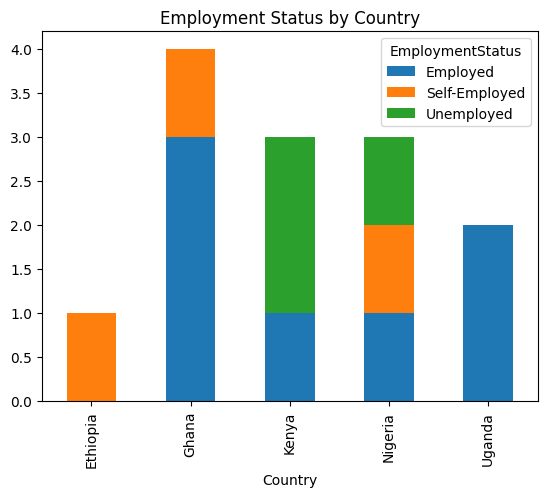

In [9]:
#Statistics by Country

print(customers_df.groupby('Country')[['Income', 'Age', 'AccountAge']].describe())

#Distribution of Employment Status by Country

employment_dist = customers_df.groupby(['Country', 'EmploymentStatus']).size().unstack()
employment_dist.plot(kind= 'bar', stacked=True, title='Employment Status by Country')

### Transaction Analysis

Month       2024-01  2024-02  2024-03  2024-04  2024-05  2024-06  2024-07
CustomerID                                                               
1              50.0    200.0      0.0      0.0      0.0      0.0      0.0
2               0.0      0.0    150.0      0.0      0.0      0.0      0.0
3               0.0      0.0      0.0    100.0      0.0      0.0      0.0
4               0.0      0.0      0.0      0.0    500.0      0.0      0.0
5               0.0      0.0      0.0      0.0      0.0     70.0      0.0


<Axes: title={'center': 'Monthly Spending Patterns per Customer'}, xlabel='Month'>

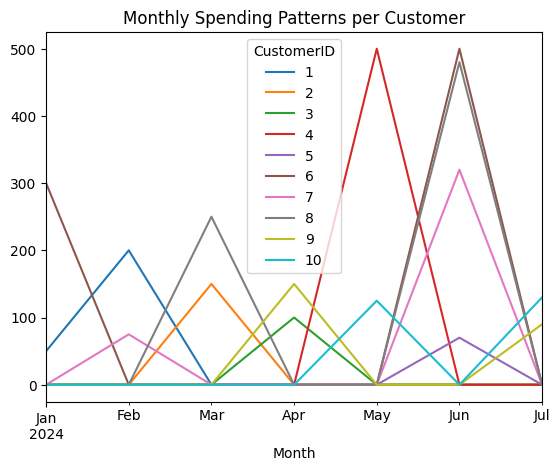

In [10]:
# Monthly total transaction amount for each customer
transactions_df['Month'] = transactions_df['TransactionDate'].dt.to_period('M')
monthly_transactions = transactions_df.groupby(['CustomerID', 'Month'])['Amount'].sum().unstack(fill_value=0)
print(monthly_transactions.head())

# Visualize spending patterns
monthly_transactions.T.plot(title="Monthly Spending Patterns per Customer")

### Loan Application Analysis

Status            Approved  Rejected
EmploymentStatus                    
Employed          0.714286  0.285714
Self-Employed     0.200000  0.800000
Unemployed        0.666667  0.333333


<Axes: title={'center': 'Loan Approval Rate by Employment Status'}, xlabel='EmploymentStatus'>

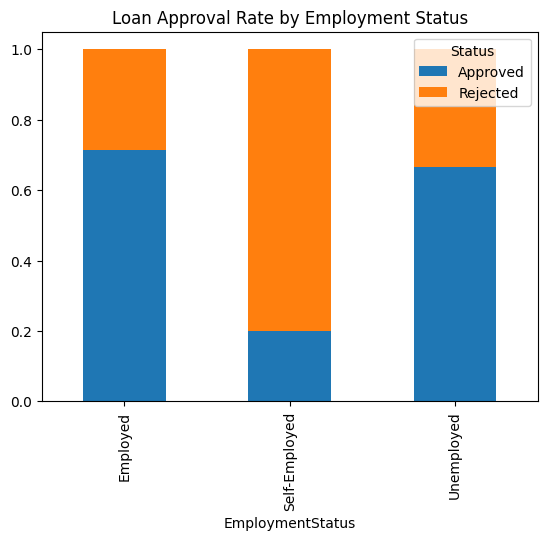

In [13]:
# Approval rates by EmploymentStatus
approval_rates = loanapplications_df.merge(customers_df, on='CustomerID')
approval_rate_by_employment = approval_rates.groupby('EmploymentStatus')['Status'].value_counts(normalize=True).unstack().fillna(0)
print(approval_rate_by_employment)

# Visualize approval rates
approval_rate_by_employment.plot(kind='bar', stacked=True, title="Loan Approval Rate by Employment Status")


### Credit Score Analysis

<Axes: title={'center': 'Average Credit Score Over Time'}, xlabel='Month'>

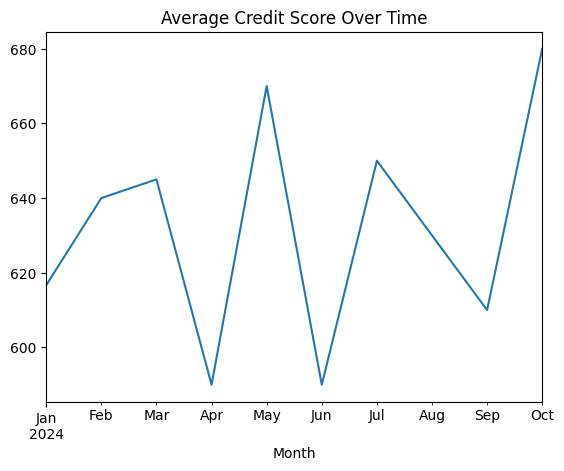

In [17]:
# Average credit score by month
creditscorehistory_df['Month'] = creditscorehistory_df['DateUpdated'].dt.to_period('M')
avg_credit_score_by_month = creditscorehistory_df.groupby('Month')['Score'].mean()
avg_credit_score_by_month.plot(title="Average Credit Score Over Time")

###  Mobile Usage Analysis : correlations between mobile usage (data and call time) and financial behaviors.

In [18]:
# Correlation between MonthlyDataUsage, AverageMonthlyCalls, and Income
mobile_usage_stats = mobileusage_df.merge(customers_df, on='CustomerID')
correlation = mobile_usage_stats[['MonthlyDataUsage', 'AverageMonthlyCalls', 'Income']].corr()
print("Correlation matrix:\n", correlation)

Correlation matrix:
                      MonthlyDataUsage  AverageMonthlyCalls    Income
MonthlyDataUsage             1.000000             0.533813  0.187417
AverageMonthlyCalls          0.533813             1.000000  0.350663
Income                       0.187417             0.350663  1.000000


### Modeling the Credit Scoring System with Random Forest

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Feature Engineering
features = approval_rates[['Income', 'AccountAge', 'EmploymentStatus', 'LoanAmount']]
features = pd.get_dummies(features, drop_first=True)  # Encode categorical variables
target = (approval_rates['Status'] == 'Approved').astype(int)  # Binary target for loan approval

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 60.00%


## Hyperparameter Tuning for better accuracy

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [21]:
model = RandomForestClassifier(random_state=42)

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],          # Number of trees
    'max_depth': [None, 10, 20, 30],         # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],         # Minimum samples to split an internal node
    'min_samples_leaf': [1, 2, 4],           # Minimum samples at each leaf node
    'max_features': ['auto', 'sqrt', 'log2'] # Number of features to consider at each split
}


In [24]:
# Setting up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

In [25]:
# Fitting the grid search to your data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


C:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
324 fits failed out of a total of 972.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
262 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Administrator\AppData\Local\Programs\Python\Python31

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=2)